Testing both models working together.

In [1]:
from keras.models import load_model
from utils.mean_subtract import MeanSubtract
from utils.aspect_aware_resize import AspectAwareResize

import pickle
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

c:\users\yq\anaconda3\envs\tf\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
means = pickle.load(open("rgb_means.pkl", "rb"))
aar = AspectAwareResize(96, 96)
ms = MeanSubtract(means["R"], means["G"], means["B"])

In [3]:
# "randomly" selecting pictures from test set (cherry-picking =D)
img0 = "test/778.png"
img1 = "test/45.png"
img2 = "test/58.png"
img3 = "test/116.png"
img4 = "test/176.png"
img5 = "test/194.png"
img6 = "test/246.png"
img7 = "test/422.png"
img8 = "test/994.png"
img9 = "test/671.png"
images = [img0, img1, img2, img3, img4, img5, img6, img7, img8, img9]

In [4]:
svhnnet = load_model("svhn.h5")
vgg = load_model("detection.h5")

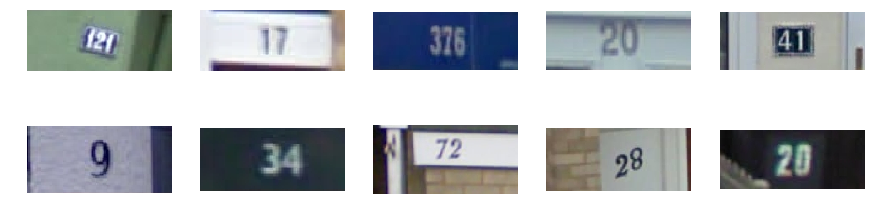

In [5]:
# show the original images
plt.figure(figsize=(15, 4))
for idx, i in enumerate(images):
    img = cv2.imread(i)
    
    plt.subplot(2, 5, idx+1)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
plt.show()

### let's see how both models work

Wall time: 0 ns


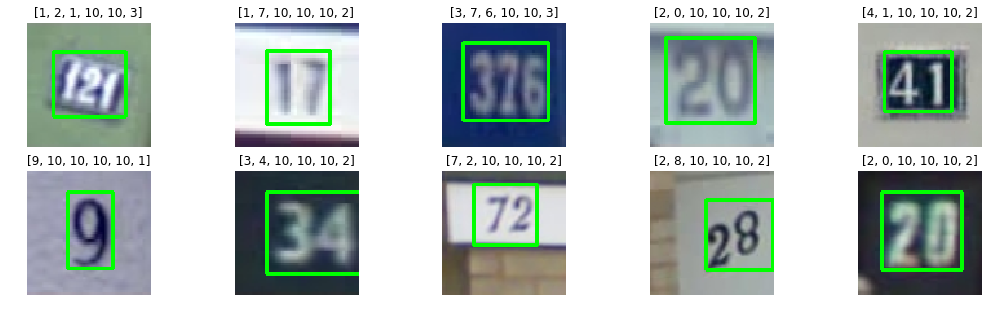

In [6]:
plt.figure(figsize=(18, 5))
%time
for idx, i in enumerate(images):
    img = cv2.imread(i)
    img = aar.preprocess(img)
    
    sub = ms.preprocess(img)
    sub1 = np.expand_dims(sub, axis=0)
    (x, y, w, h) = vgg.predict(sub1)[0]
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    x, y, w, h = int(x), int(y), int(w), int(h)
    patch = sub[y:y+h, x:x+w]
    patch = cv2.resize(patch, (54, 54))
    patch = np.expand_dims(patch, axis=0)
    number = svhnnet.predict(patch)
    
    value = []
    for n in number:
        temp = np.argmax(n, axis=-1)
        value.append(temp[0])
    
    plt.subplot(2, 5, idx+1)
    plt.axis("off")
    plt.title(value)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()